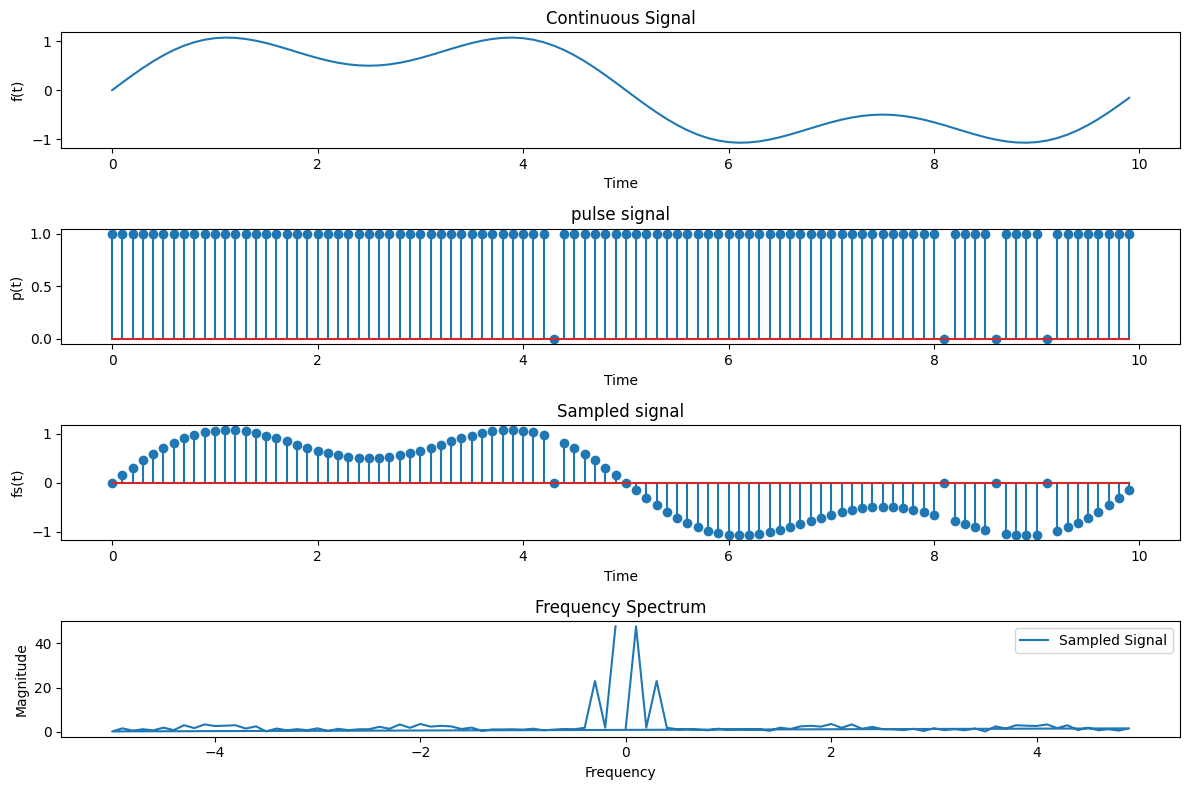

In [2]:
## 安装依赖库
# !pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt

# 定义连续信号 f(t)
def continuous_signal(t):
    return np.sin(2 * np.pi * 0.1*t) + 0.5 * np.sin(6 * np.pi * 0.1*t)

# 周期单位冲激脉冲序列 p(t)
def dirac_pulse(t, Ts):
    return np.where(np.abs((t / Ts) % 1) < 1e-10, 1, 0)

# 计算信号的傅里叶变换(采用FFT)
def fourier_transform(signal, t):
    dt = t[1] - t[0]
    N = len(t)
    frequency = np.fft.fftfreq(N, dt)
    spectrum = np.fft.fft(signal)
    return frequency, spectrum

# 设置抽样参数
Ts = 0.1  # 抽样周期
fs = 1 / Ts  # 抽样频率

# 生成时间序列
t = np.arange(0, 10, Ts)

# 生成连续信号
f = continuous_signal(t)

# 计算周期单位冲激脉冲序列
p = dirac_pulse(t, Ts)

# 计算抽样后信号
fs = f * p

# 计算连续信号的傅里叶变换
frequency_f, spectrum_f = fourier_transform(f, t)

# 计算抽样信号的傅里叶变换
frequency_p, spectrum_p = fourier_transform(p, t)

# 计算抽样后序列的傅里叶变换
frequency_fs, spectrum_fs = fourier_transform(fs, t)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, f)
plt.xlabel('Time')
plt.ylabel('f(t)')
plt.title('Continuous Signal')

plt.subplot(4, 1, 2)
plt.stem(t, p)
plt.xlabel('Time')
plt.ylabel('p(t)')
plt.title('pulse signal')

plt.subplot(4, 1, 3)
plt.stem(t, fs)
plt.xlabel('Time')
plt.ylabel('fs(t)')
plt.title('Sampled signal')

plt.subplot(4, 1, 4)
plt.plot(frequency_fs, np.abs(spectrum_fs))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend(['Sampled Signal'])
plt.title('Frequency Spectrum')
plt.tight_layout()

plt.savefig('p1.png',dpi=300)
plt.show()